In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
#required libraries
 




In [ ]:
#use the following code only if you need to use a new data frame with different start date

#start date for correlation window 
start = datetime(2020, 12, 1)
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

first_table = payload[0]
symbols_list = first_table['Symbol'].values.tolist()
new_symbols_list = []

# converts tickers that have . to - to match yahoo's format
for string in symbols_list:
    new_symbol_list = string.replace(".", "-")
    new_symbols_list.append(new_symbol_list)
symbols_list = new_symbols_list

symbols_list.insert(0, 'BTC-USD')


#array to store prices  
symbols=[]
#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
#df.to_csv('12_01_2020.csv')       #convert any df to csv when required


In [2]:
# df read from a csv file
df = pd.read_csv("12_01_2020.csv")          #read the csv file 
df_pivot = df.pivot('Date','Symbol','Close').reset_index() #pivots the dataframe

In [14]:
 #correlation matrix code
 corr_df = df_pivot.corr(method='pearson') 
 #reset symbol as index (rather than 0-X)
 corr_df.head().reset_index()
 corr_df.index.name = None
 

In [15]:
#BTC-USD column in the matrix is picked
BTC_corr = corr_df[['BTC-USD']]
# k is the threshold number at which BTC-USD top positive & negative correlation comparision is ended
k = 20
BTC_corrhigh = BTC_corr.nlargest(k+1, ['BTC-USD'])
BTC_corrhigh = BTC_corrhigh[1:]
BTC_corrlow  = BTC_corr.nsmallest(k, ['BTC-USD'])
#final results in descending order
result = pd.concat([BTC_corrhigh,BTC_corrlow])
print(result)

Symbol   BTC-USD
COF     0.960793
GS      0.955936
JPM     0.950703
TPR     0.946292
FCX     0.944109
RJF     0.943214
L       0.942648
SIVB    0.941426
KEY     0.940705
RF      0.936872
APTV    0.933288
JCI     0.930848
FITB    0.930036
FRC     0.929860
ULTA    0.928608
BAC     0.927744
PNC     0.926721
DE      0.925052
CMA     0.924832
WFC     0.924674
WEC    -0.909036
PFE    -0.877665
CL     -0.861481
PEP    -0.857594
CMS    -0.843138
LNT    -0.838062
CHTR   -0.834703
CHD    -0.834161
AEE    -0.833849
ETR    -0.830138
XEL    -0.824394
SBAC   -0.821683
EIX    -0.821239
K      -0.807627
MDLZ   -0.801551
AEP    -0.797918
VZ     -0.782060
PRGO   -0.780237
PG     -0.779887
TMUS   -0.772869


<ipython-input-6-c4dd668cc5fb>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


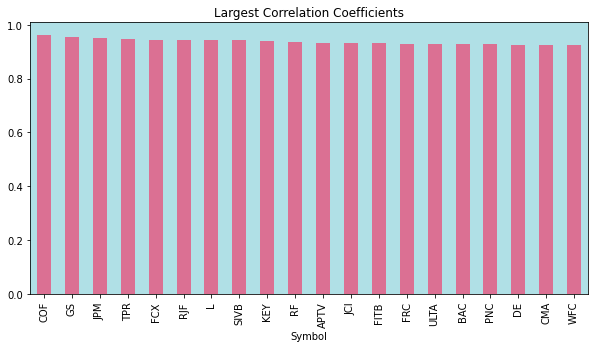

In [6]:
BTC_corrhigh['BTC-USD'].plot(kind='bar',figsize=( 10, 5), title= 'Largest Correlation Coefficients', color = 'palevioletred', grid = False)
ax = plt.axes()
ax.set_facecolor('powderblue')

<ipython-input-7-353d88ad8550>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


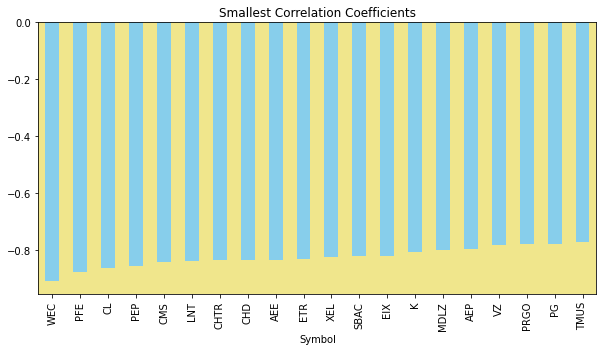

In [7]:
BTC_corrlow['BTC-USD'].plot(kind='bar',figsize=( 10, 5), title= 'Smallest Correlation Coefficients', color = 'skyblue', grid = False)
ax = plt.axes()
ax.set_facecolor('khaki')

<AxesSubplot:title={'center':'Largest Correlation Coefficients'}, ylabel='Density'>

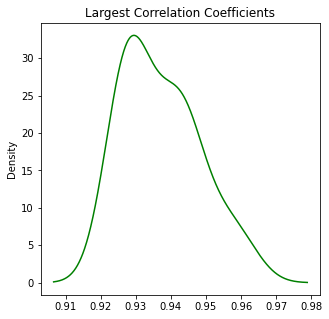

In [10]:
BTC_corrhigh['BTC-USD'].plot(kind='kde', figsize=( 5, 5), title= 'Largest Correlation Coefficients', color = 'green' ) #kernel density estimation plot
 

<AxesSubplot:title={'center':'Smallest Correlation Coefficients'}, ylabel='Density'>

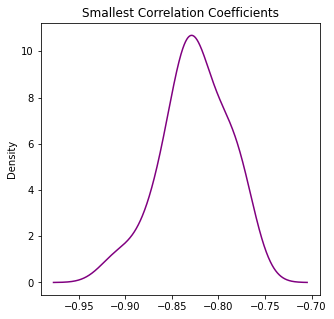

In [9]:
BTC_corrlow['BTC-USD'].plot(kind='kde', figsize=( 5, 5), title= 'Smallest Correlation Coefficients', color = 'purple' ) #kernel density estimation plot